In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf

In [26]:
W_true = 2
b_true = 0.5

In [27]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

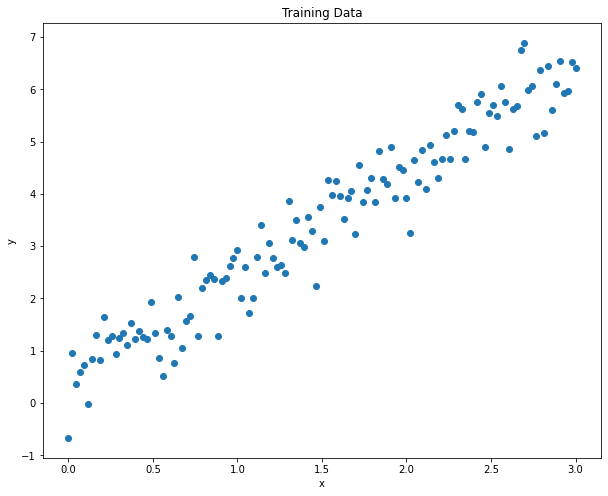

In [28]:
plt.figure(figsize=(10, 8))

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')

plt.title("Training Data")
plt.show()

In [29]:
class LinearModel:

    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name="W")
        self.bias = tf.Variable(np.random.randn(), name = "b")

    def __call__(self, x):
        return self.weight * x + self.bias

In [30]:
def loss(y, y_pred):
        return tf.reduce_mean(tf.square(y - y_pred))

In [31]:
def train(linear_model, x, y, lr = 0.01):

    with tf.GradientTape() as tape:

        y_pred = linear_model(x)

        current_loss = loss(y, y_pred)
    
    d_weight, d_bias = tape.gradient(current_loss,
                                     [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [32]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 100

lr = 0.15

In [33]:
for epoch_count in range(epochs):

    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())

    real_loss = loss(y, linear_model(x))

    train(linear_model, x, y, lr = lr)

    print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 3.9433341026306152
Epoch count 1: Loss value: 0.49490126967430115
Epoch count 2: Loss value: 0.400515615940094
Epoch count 3: Loss value: 0.37795478105545044
Epoch count 4: Loss value: 0.359271377325058
Epoch count 5: Loss value: 0.3427865505218506
Epoch count 6: Loss value: 0.3282192647457123
Epoch count 7: Loss value: 0.31534603238105774
Epoch count 8: Loss value: 0.3039698600769043
Epoch count 9: Loss value: 0.2939166724681854
Epoch count 10: Loss value: 0.2850325405597687
Epoch count 11: Loss value: 0.2771815359592438
Epoch count 12: Loss value: 0.2702435553073883
Epoch count 13: Loss value: 0.2641124427318573
Epoch count 14: Loss value: 0.25869423151016235
Epoch count 15: Loss value: 0.25390616059303284
Epoch count 16: Loss value: 0.24967490136623383
Epoch count 17: Loss value: 0.24593569338321686
Epoch count 18: Loss value: 0.24263133108615875
Epoch count 19: Loss value: 0.2397112399339676
Epoch count 20: Loss value: 0.23713071644306183
Epoch count 21: 

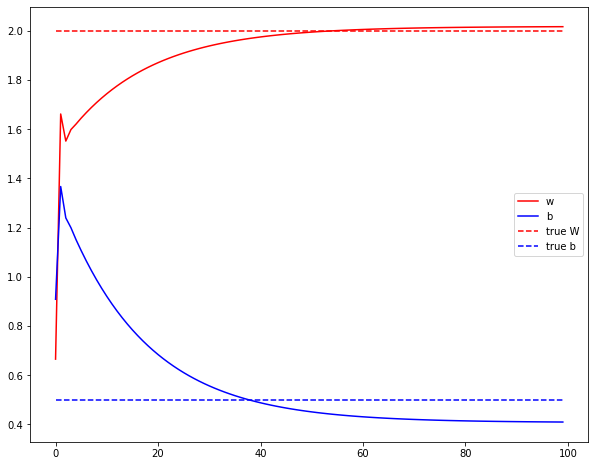

In [34]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['w', 'b', 'true W', 'true b'])

In [35]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(2.0167866, 0.40983376)

In [36]:
rmse = loss(y, linear_model(x))

rmse.numpy()

0.2175221

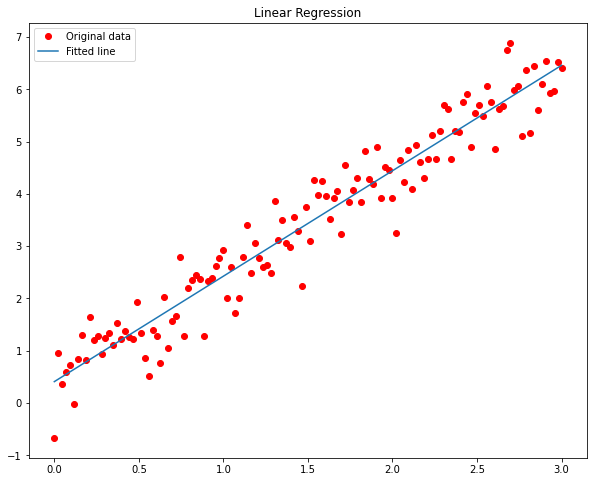

In [37]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label = 'Original data')
plt.plot(x, linear_model(x), label = 'Fitted line')

plt.title('Linear Regression')

plt.legend()
plt.show()

In [38]:
from tensorflow import keras
from tensorflow.keras import layers 

In [39]:
x.shape, y.shape

((130,), (130,))